In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', 250)

### 피벗 테이블
+ 소량의 데이터는 별다른 수고없이 통계분석 가능
+ 하지만 대량의 데이터는 통계분석하기 어려움
+ 수많은 데이터 중 원하는 데이터만 골라서 테이블을 재구성한 것을 의미
+ pivot(행, 열, 대상)
+ pivot_table()

In [58]:
df = pd.DataFrame()

In [59]:
df['city'] = ['서울', '서울', '서울', '부산', '부산', '부산', '인천', '인천']
df['year'] = [2015, 2010, 2005, 2015, 2010, 2005, 2015, 2010]
df['pop'] = [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203]
df['region'] = ['수도권', '수도권', '수도권', '경상권', '경상권', '경상권', '수도권', '수도권']
df

,city,year,pop,region
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


### 도시별, 연도별 인구수 

In [6]:
df.pivot('city', 'year', 'pop')

year,2005,2010,2015
city,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [7]:
df.pivot('year','city','pop')

city,부산,서울,인천
year,,,
2005,3512547.0,9762546.0,NaN
2010,3393191.0,9631482.0,263203.0
2015,3448737.0,9904312.0,2890451.0


In [60]:
pv = df.pivot('city', 'year', 'pop')
for c in pv.columns:
    pv[c]= pv[c].apply(lambda x:('{:,.0f}').format(x))

### 도시별 연도별 인구수 - groupby

In [12]:
groupby = df.groupby(['city', 'year',])
groupby.groups

{('부산', 2005): [5], ('부산', 2010): [4], ('부산', 2015): [3], ('서울', 2005): [2], ('서울', 2010): [1], ('서울', 2015): [0], ('인천', 2010): [7], ('인천', 2015): [6]}

In [13]:
groupby['pop'].sum()

city  year
부산    2005    3512547
      2010    3393191
      2015    3448737
서울    2005    9762546
      2010    9631482
      2015    9904312
인천    2010     263203
      2015    2890451
Name: pop, dtype: int64

### pivot_table
+ pivot과 table을 적당히 섞은 함수
+ pivot에서 지원하지 않는 다양한 집계함수를 지원
+ pivot_table(대상, 행, 열, 집계함수, 총계여부)

#### 도시별 연도별 인구수

In [14]:
df.pivot_table('pop', 'city', 'year')

year,2005,2010,2015
city,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [36]:
df.pivot_table('pop', 'city', 'year', aggfunc=sum)

year,2005,2010,2015
city,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [18]:
df.pivot_table('pop', 'city', 'year', margins=True, margins_name='sum').style.format('{:,.0f}')

year,2005,2010,2015,sum
city,,,,
부산,"3,512,547","3,393,191","3,448,737","3,451,492"
서울,"9,762,546","9,631,482","9,904,312","9,766,113"
인천,nan,"263,203","2,890,451","1,576,827"
sum,"6,637,546","4,429,292","5,414,500","5,350,809"


#### 도시별 연도별 인구수 (도시와 연도를 행에 출력)

In [19]:
df.pivot_table('pop', ['city', 'year']).style.format('{:,.0f}')

In [37]:
import seaborn as sns

In [38]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 성별 요일별 팁 현황
#### 팁을 준 고객의 성별 분류
#### 성별 흡연/비흡연 고객 분류

In [93]:
tips.pivot_table('tip', 'sex', 'day',  aggfunc=sum).style.format('{:,.2f}')

day,Thur,Fri,Sat,Sun
sex,,,,
Male,89.41,26.93,181.95,186.78
Female,82.42,25.03,78.45,60.61


In [95]:
tips.groupby(['sex','day'])['tip'].sum()

sex     day 
Male    Thur     89.41
        Fri      26.93
        Sat     181.95
        Sun     186.78
Female  Thur     82.42
        Fri      25.03
        Sat      78.45
        Sun      60.61
Name: tip, dtype: float64

In [101]:
tips.groupby('sex')['tip'].count()

sex
Male      157
Female     87
Name: tip, dtype: int64

In [102]:
tips.pivot_table('tip', 'sex', aggfunc=np.count_nonzero)

,tip
sex,
Male,157
Female,87


In [108]:
tips.groupby(['sex', 'smoker'])['tip'].count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: tip, dtype: int64

In [111]:
tips.pivot_table('total_bill', ['sex', 'smoker'], aggfunc='count')

total_bill
sex    smoker            
Male   Yes             60
       No              97
Female Yes             33
       No              54

#### CDC에서 수집한 연도별 신생아 성별 출생수 데이터

In [79]:
birth = pd.read_csv('births.csv')
birth.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [121]:
birth.groupby('year')['births'].sum()

year
1969    3600206
1970    3737800
1971    3563548
1972    3266235
1973    3146125
1974    3170631
1975    3153556
1976    3176476
1977    3332159
1978    3338300
1979    3499795
1980    3617981
1981    3635515
1982    3685457
1983    3642821
1984    3673568
1985    3765064
1986    3760695
1987    3813216
1988    3913793
1989    4045693
1990    4162917
1991    4115342
1992    4069428
1993    4004523
1994    3956925
1995    3903012
1996    3894874
1997    3884329
1998    3945192
1999    3963465
2000    4063823
2001    4031531
2002    4027376
2003    4096092
2004    4118907
2005    4145619
2006    4273225
2007    4324008
2008    4255156
Name: births, dtype: int64

In [122]:
birth.pivot_table('births', 'year', aggfunc=sum).style.format('{:,.2f}')

,births
year,
1969,"3,600,206.00"
1970,"3,737,800.00"
1971,"3,563,548.00"
1972,"3,266,235.00"
1973,"3,146,125.00"
1974,"3,170,631.00"
1975,"3,153,556.00"
1976,"3,176,476.00"
1977,"3,332,159.00"


In [124]:
birth.pivot_table('births', 'month', aggfunc=sum).style.format('{:,.2f}')

,births
month,
1,"12,364,197.00"
2,"11,541,178.00"
3,"12,678,844.00"
4,"12,085,891.00"
5,"12,624,972.00"
6,"12,521,070.00"
7,"13,367,556.00"
8,"13,528,007.00"
9,"13,252,831.00"


In [126]:
birth.pivot_table('births', 'year', 'gender', aggfunc=sum).style.format('{:,.2f}')

gender,F,M
year,,
1969,"1,753,634.00","1,846,572.00"
1970,"1,819,164.00","1,918,636.00"
1971,"1,736,774.00","1,826,774.00"
1972,"1,592,347.00","1,673,888.00"
1973,"1,533,102.00","1,613,023.00"
1974,"1,543,005.00","1,627,626.00"
1975,"1,535,546.00","1,618,010.00"
1976,"1,547,613.00","1,628,863.00"
1977,"1,623,363.00","1,708,796.00"


In [ ]:
# 2016년 미국 대통령 선거 데이터 분석 예제

# primary_results.csv (변수명 : primary)

# => 각 주, 정당, 후보자 및 득표수

# county_facts.csv (변수명 : counties)

# => 각 유권자별 투표 데이터

# 분석1 : 각 후보별 전체 지역 득표수

# 분석2 : 각 주별 정당별 득표수

# 분석3 : 정당별 당선된 후보의 백인유권자 수

# counties의 RHI125214 컬럼은 주별 백인유권자비율

# => '백인유권자들은 공화당 후보를 주로 밀어준다'

# RHI125214: 백인 유권자

# RHI225214: 흑인 유권자

# RHI325214: 미국 인디언 유권자

# RHI425214: 아시안 유권자

# RHI525214: 하와이 원주민 유권자

# RHI625214: 혼혈 유권자

# RHI725214: 히스페닉/라틴 유권자

# 객체명.plot(kind='bar') - 시각화

In [4]:
primary = pd.read_csv('data/primary_results.txt')
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [3]:
county = pd.read_csv('data/county_facts.txt')
county.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [162]:
primary.pivot_table('votes', 'candidate', aggfunc=sum)

,votes
candidate,
No Preference,8152
Uncommitted,43
Ben Carson,564553
Bernie Sanders,11959102
Carly Fiorina,15191
Chris Christie,24353
Donald Trump,13302541
Hillary Clinton,15692452
Jeb Bush,94411


In [161]:
primary.groupby('candidate')['votes'].sum()

candidate
 No Preference         8152
 Uncommitted             43
Ben Carson           564553
Bernie Sanders     11959102
Carly Fiorina         15191
Chris Christie        24353
Donald Trump       13302541
Hillary Clinton    15692452
Jeb Bush              94411
John Kasich         4159949
Marco Rubio         3321076
Martin O'Malley         752
Mike Huckabee          3345
Rand Paul              8479
Rick Santorum          1782
Ted Cruz            7603006
Name: votes, dtype: int64

In [151]:
primary.pivot_table('votes', 'party', 'state', aggfunc=sum).style.format('{:,.0f}')

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
party,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Democrat,"386,327",539,"399,097","209,448","3,442,623","121,184","322,485","92,609","1,664,003","757,340","33,658","23,705","1,987,834","638,638","139,980","39,043","423,176","293,855","3,415","814,522","1,198,652","1,172,017","218,795","619,673","118,362","33,460","11,937","246,836","877,496","214,307","1,817,552","1,076,699",354,"1,192,815","313,392","572,485","1,638,644","119,213","367,491","53,004","365,637","1,410,641","76,999","134,198","778,865","26,299","210,214","1,000,703",280
Republican,"837,632","21,930","435,103","396,523","1,495,574",nan,"208,817","67,807","2,276,926","1,275,601","13,228","215,284","1,384,703","1,080,653","186,724","72,253","225,709","291,926",nan,"418,750","614,668","1,259,094","395,405","911,999","139,154","180,231","74,878","279,130","443,724","95,225","868,987","1,109,048",nan,"2,011,357","452,731","361,490","1,537,696","60,381","737,917","66,877","834,939","2,737,248","177,204","58,762","1,012,807","510,851","188,138","1,072,699",903


In [149]:
primary.groupby(['party', 'state'])['votes'].sum()

party       state        
Democrat    Alabama           386327
            Alaska               539
            Arizona           399097
            Arkansas          209448
            California       3442623
                              ...   
Republican  Virginia         1012807
            Washington        510851
            West Virginia     188138
            Wisconsin        1072699
            Wyoming              903
Name: votes, Length: 95, dtype: int64

In [163]:
primary.candidate.value_counts()

Bernie Sanders     4205
Hillary Clinton    4205
Donald Trump       3586
John Kasich        3586
Ted Cruz           3586
Marco Rubio        2555
Ben Carson         1669
 No Preference      351
Jeb Bush            155
Carly Fiorina       109
Chris Christie      109
 Uncommitted         99
Martin O'Malley      99
Mike Huckabee        99
Rand Paul            99
Rick Santorum        99
Name: candidate, dtype: int64

In [164]:
primary.party.value_counts()

Republican    15652
Democrat       8959
Name: party, dtype: int64

#### 공화당 후보자별 득표수

In [165]:
searchn = primary.party == 'Republican'

In [166]:
republic = primary[searchn]

In [167]:
republic.groupby(['candidate'])['votes'].sum()

candidate
Ben Carson          564553
Carly Fiorina        15191
Chris Christie       24353
Donald Trump      13302541
Jeb Bush             94411
John Kasich        4159949
Marco Rubio        3321076
Mike Huckabee         3345
Rand Paul             8479
Rick Santorum         1782
Ted Cruz           7603006
Name: votes, dtype: int64

#### 민주당 후보자별 득표수

In [168]:
searchd = primary.party == 'Democrat'

In [171]:
democrat = primary[searchd]

In [172]:
democrat.groupby(['candidate'])['votes'].sum()

candidate
 No Preference         8152
 Uncommitted             43
Bernie Sanders     11959102
Hillary Clinton    15692452
Martin O'Malley         752
Name: votes, dtype: int64

#### 경선에서 당선된 후보별 지역 득표수

In [173]:
search6 = primary.candidate == 'Donald Trump'
vote1 = primary[search6]
vote1

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
135,Alabama,AL,Autauga,1001.0,Republican,Donald Trump,5387,0.445
140,Alabama,AL,Baldwin,1003.0,Republican,Donald Trump,23618,0.469
145,Alabama,AL,Barbour,1005.0,Republican,Donald Trump,1710,0.501
150,Alabama,AL,Bibb,1007.0,Republican,Donald Trump,1959,0.494
155,Alabama,AL,Blount,1009.0,Republican,Donald Trump,7390,0.487
...,...,...,...,...,...,...,...,...
24591,Wyoming,WY,Laramie,95600036.0,Republican,Donald Trump,0,0.000
24595,Wyoming,WY,Sheridan-Big Horn,95600031.0,Republican,Donald Trump,0,0.000
24599,Wyoming,WY,Sweetwater-Carbon,95600026.0,Republican,Donald Trump,16,0.180
24603,Wyoming,WY,Teton-Sublette,95600028.0,Republican,Donald Trump,21,0.525


In [189]:
vote1 = vote1.groupby('state')['votes'].sum()

In [179]:
vote1.votes.sort_values(ascending=False)

1519     179130
1552     146888
800      144522
1573     124255
4700      91520
          ...  
24567         0
24563         0
1010          0
11529         0
24607         0
Name: votes, Length: 3586, dtype: int64

In [207]:
search7 = primary.candidate == 'Hillary Clinton'
vote2 = primary[search7]
vote2

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
5,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906
7,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755
9,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551
...,...,...,...,...,...,...,...,...
24554,Wyoming,WY,Sweetwater,56037.0,Democrat,Hillary Clinton,10,0.455
24556,Wyoming,WY,Teton,56039.0,Democrat,Hillary Clinton,6,0.400
24558,Wyoming,WY,Uinta,56041.0,Democrat,Hillary Clinton,4,0.444
24560,Wyoming,WY,Washakie,56043.0,Democrat,Hillary Clinton,2,0.667


In [190]:
vote2 = vote2.groupby('state')['votes'].sum()

In [201]:
vote1 = vote1.sort_values(ascending=False).head(10)

In [195]:
vote2 = vote2.sort_values(ascending=False).head(10)

<AxesSubplot:xlabel='state'>

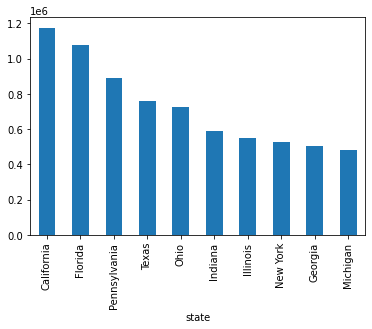

In [202]:
vote1.plot(kind='bar')


<AxesSubplot:xlabel='state'>

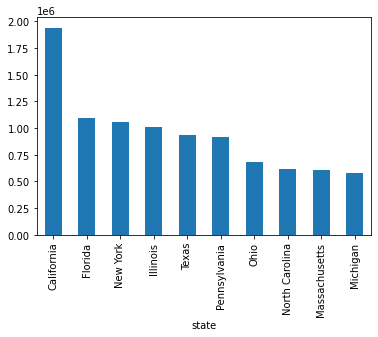

In [198]:
vote2.plot(kind='bar')

#### 분석2 : 주별 정당 득표수

In [221]:
search8 = (primary.candidate == 'Hillary Clinton') | (primary.candidate == 'Donald Trump')

In [223]:
vote3 = primary[search8]

In [224]:
vote3a = vote3.groupby(['state','party'])['votes'].sum()

<AxesSubplot:xlabel='state,party'>

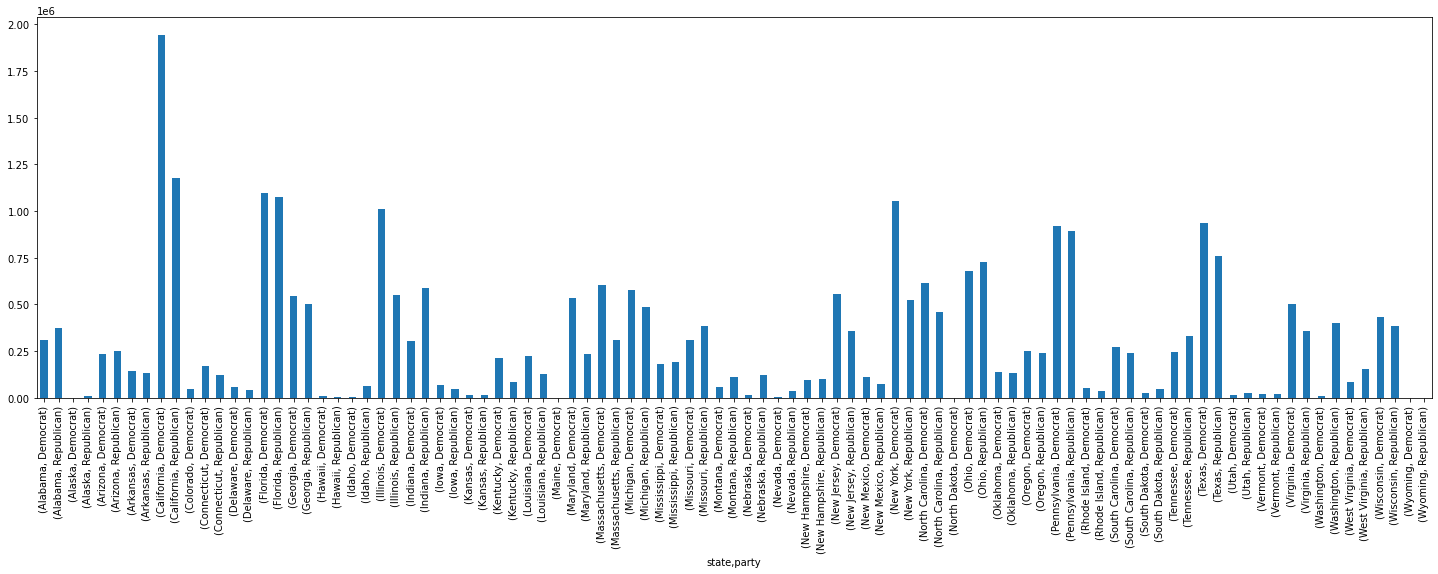

In [225]:
vote3a.plot(kind='bar', figsize=(25,7))

### 그룹핑한 결과는 다중인덱스를 가진 데이터프레임으로 
+ 1st index : state
+ 2nd index : party
+ 값 : votes
+ 세로로 길게 출력되는 표형태를 따름 : long table
+ -> 다중 인덱스때문에 그래프가 제대로 출력되지 않음 
+ -> '다중 인덱스를 각 열로 표시'하는 wide table 형태로 출력해야 함
+ -> long table -> wide table : unstack 함수 사용
+ -> pivot_table 함수로 그룹핑하면 바로 wide table이 됨

In [230]:
vote3b = vote3.pivot_table('votes', 'state', 'party', aggfunc=sum)

In [231]:
vote3b.head()

party,Democrat,Republican
state,,
Alabama,309928.0,371735.0
Alaska,99.0,7346.0
Arizona,235697.0,249916.0
Arkansas,144580.0,133144.0
California,1940580.0,1174829.0


<AxesSubplot:xlabel='state'>

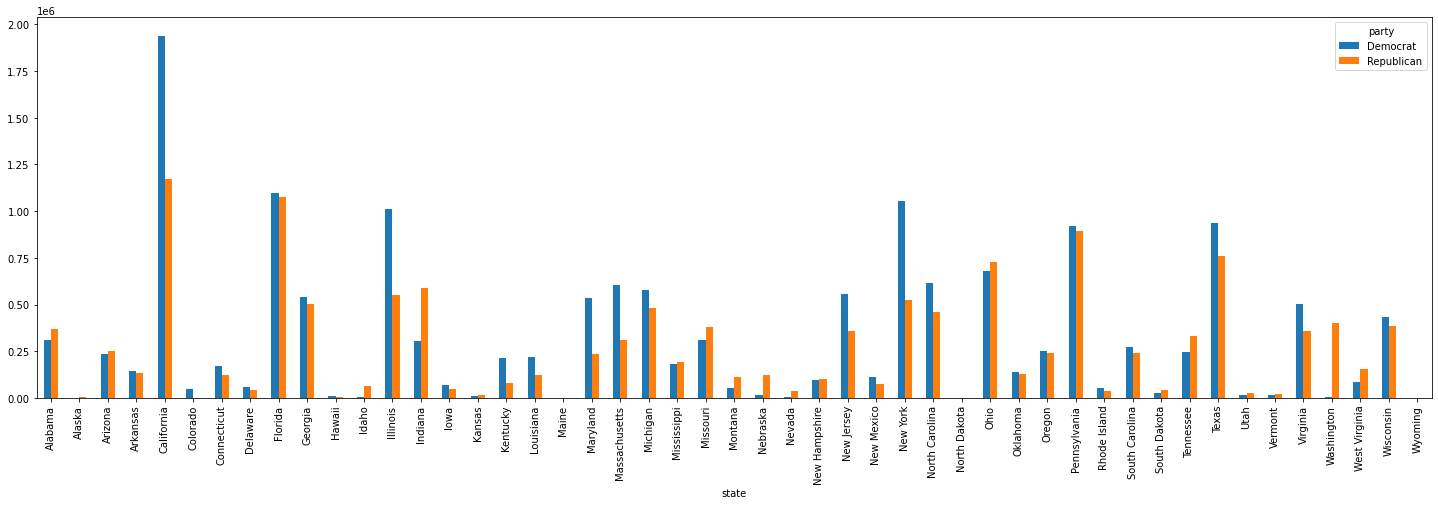

In [232]:
vote3b.plot(kind='bar', figsize=(25,7))

<AxesSubplot:xlabel='state'>

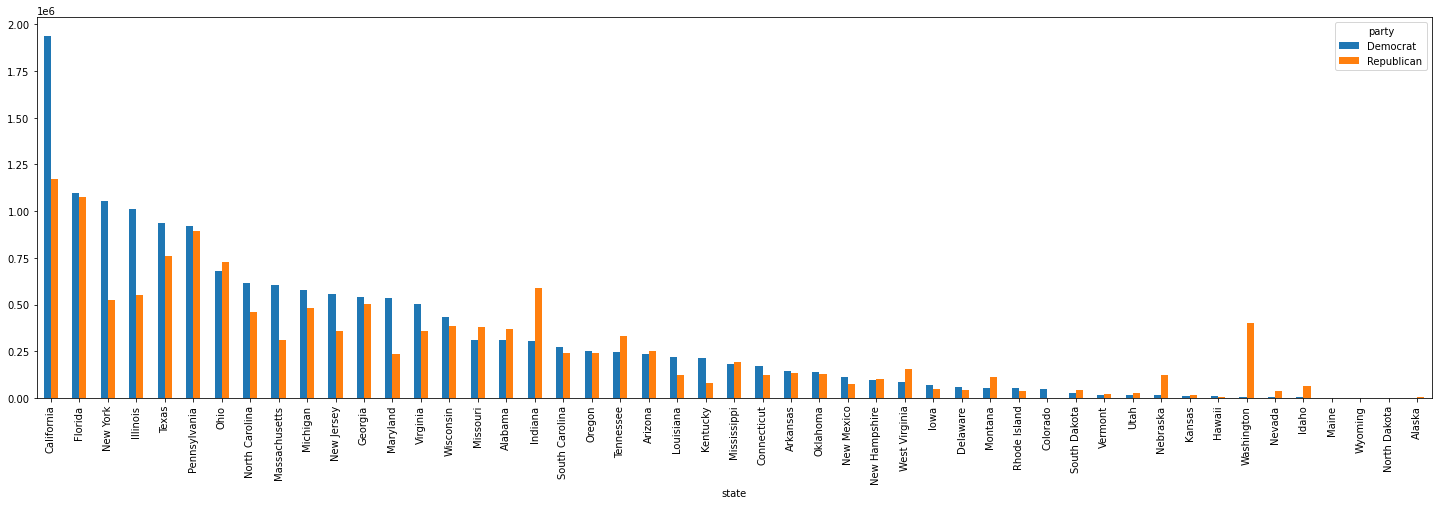

In [233]:
vote3b.sort_values(by=['Democrat'], ascending=False).plot(kind='bar', figsize=(25,7))

<AxesSubplot:xlabel='state'>

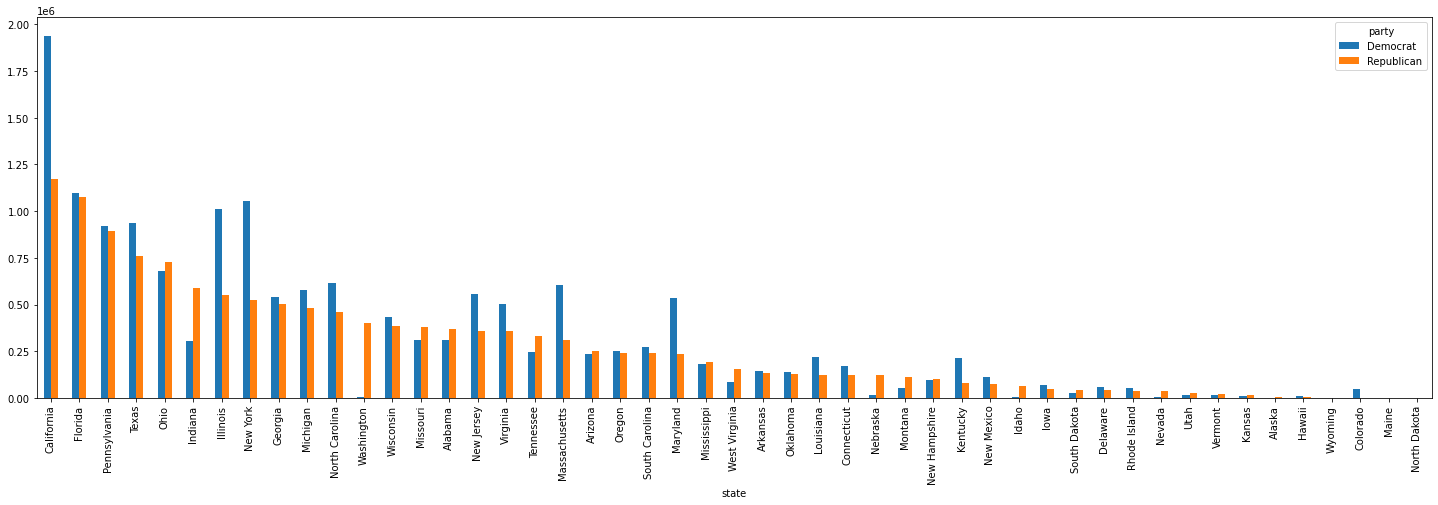

In [235]:
vote3b.sort_values(by=['Republican'], ascending=False).plot(kind='bar', figsize=(25,7))

In [5]:
primary.columns

Index(['state', 'state_abbreviation', 'county', 'fips', 'party', 'candidate',
       'votes', 'fraction_votes'],
      dtype='object')

In [6]:
county.columns

Index(['fips', 'area_name', 'state_abbreviation', 'PST045214', 'PST040210',
       'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214',
       'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214',
       'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213',
       'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213',
       'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213',
       'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207',
       'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207',
       'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207',
       'AFN120207', 'BPS030214', 'LND110210', 'POP060210'],
      dtype='object')

#### fips : 연방처리코드(Federal Information Processing Standards)

### 백인 유권자들은 어느 정당을 더 지지하는가
+ county에서 RHI125214에 대한 fips 코드를 알아낸 다음 primary 집계를 수행

In [25]:
primary.head(10)

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
5,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906
6,Alabama,AL,Bibb,1007.0,Democrat,Bernie Sanders,246,0.197
7,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755
8,Alabama,AL,Blount,1009.0,Democrat,Bernie Sanders,395,0.386
9,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551


#### county 별 많은 득표수

In [10]:
winvote = primary.groupby('fips')['votes'].agg('max')
winvote

fips
1001.0         5387
1003.0        23618
1005.0         2567
1007.0         1959
1009.0         7390
              ...  
95600032.0       68
95600033.0       27
95600034.0       38
95600035.0       83
95600036.0      141
Name: votes, Length: 4207, dtype: int64

#### 

In [11]:
primary.groupby('fips').agg('max')

,state,state_abbreviation,county,party,candidate,votes,fraction_votes
fips,,,,,,,
1001.0,Alabama,AL,Autauga,Republican,Ted Cruz,5387,0.800
1003.0,Alabama,AL,Baldwin,Republican,Ted Cruz,23618,0.647
1005.0,Alabama,AL,Barbour,Republican,Ted Cruz,2567,0.906
1007.0,Alabama,AL,Bibb,Republican,Ted Cruz,1959,0.755
1009.0,Alabama,AL,Blount,Republican,Ted Cruz,7390,0.551
...,...,...,...,...,...,...,...
95600032.0,Wyoming,WY,Campbell-Johnson,Republican,Ted Cruz,68,1.000
95600033.0,Wyoming,WY,Crook-Weston,Republican,Ted Cruz,27,0.466
95600034.0,Wyoming,WY,Converse-Niobrara,Republican,Ted Cruz,38,0.521


In [22]:
primary.groupby(['state'])['votes'].agg('max')

state
Alabama            67357
Alaska               464
Arizona           144522
Arkansas           34862
California        590502
Colorado           14624
Connecticut         9710
Delaware           38580
Florida           132527
Georgia            82576
Hawaii             11458
Idaho              20156
Illinois          366954
Indiana            59649
Iowa               12122
Kansas             11735
Kentucky           64090
Louisiana          40601
Maine                190
Maryland          113912
Massachusetts      71422
Michigan          163886
Mississippi        31386
Missouri           89373
Montana            17925
Nebraska           23754
Nevada             20132
New Hampshire      38646
New Jersey         75071
New Mexico         38247
New York          177496
North Carolina     77927
North Dakota          10
Ohio              125914
Oklahoma           34255
Oregon             87247
Pennsylvania      212785
Rhode Island       10006
South Carolina     39243
South Dakota       

In [24]:
primary.groupby(['state', 'candidate', 'votes']).sum()

fips  fraction_votes
state   candidate  votes                            
Alabama Ben Carson 15         1105.0           0.040
                   19         1063.0           0.070
                   21         1119.0           0.075
                   44         1131.0           0.083
                   46         1047.0           0.053
...                              ...             ...
Wyoming Ted Cruz   53     95600027.0           1.000
                   64     95600029.0           0.660
                   68     95600032.0           1.000
                   83     95600035.0           1.000
                   141    95600036.0           0.653

[20161 rows x 2 columns]

In [27]:
primary.groupby(['county', 'candidate', 'votes']).sum().head(20)

fips  fraction_votes
county    candidate       votes                            
Abbeville Ben Carson      305       45001.0           0.083
          Bernie Sanders  312       45001.0           0.170
          Donald Trump    1353      45001.0           0.369
          Hillary Clinton 1501      45001.0           0.818
          Jeb Bush        236       45001.0           0.064
          John Kasich     157       45001.0           0.043
          Marco Rubio     740       45001.0           0.202
          Ted Cruz        876       45001.0           0.239
Abbot     Bernie Sanders  1      92300001.0           1.000
          Hillary Clinton 0      92300001.0           0.000
Abington   No Preference  30     92500001.0           0.012
          Ben Carson      53     92500001.0           0.025
          Bernie Sanders  1352   92500001.0           0.534
          Donald Trump    1222   92500001.0           0.579
          Hillary Clinton 1129   92500001.0           0.446
          John Kasich     299    92500001.0           0.142
          Marco Rubio     267    92500001.0           0.127
          Ted Cruz        208    92500001.0           0.099
Acadia    Bernie Sanders  1087      22001.0           0.314
          Donald Trump    1694      22001.0           0.445

#### 지역별 득표가 많은 순으로 후보 정렬
+ 민주당

In [34]:
search = primary.party == 'Democrat'

In [35]:
demo = primary[search]

#### fips별 후보별 득표수 추출

In [36]:
result1 = demo.groupby(['fips', 'candidate', 'votes']).sum()

#### 추출한 결과를 내림차순으로 정렬

In [38]:
result1.sort_values(['fips', 'votes'], ascending=False).head(10)

fraction_votes
fips       candidate       votes                
95000246.0 Bernie Sanders  311             0.928
           Hillary Clinton 24              0.072
95000245.0 Bernie Sanders  706             0.780
           Hillary Clinton 199             0.220
95000244.0 Bernie Sanders  76              0.884
           Hillary Clinton 10              0.116
95000243.0 Bernie Sanders  185             0.944
           Hillary Clinton 11              0.056
95000242.0 Bernie Sanders  306             0.927
           Hillary Clinton 23              0.070

#### 각 결과에서 첫째 행(iloc[0])은 득표수가 많은 후보를 의미
+ 지역별 경선에서 승리한 후보

In [39]:
result1.sort_values(['fips', 'votes'], ascending=False).iloc[0]

fraction_votes    0.928
Name: (95000246.0, Bernie Sanders, 311), dtype: float64

#### groupby에는 sort_values 함수를 적용하는 경우 결과가 예상대로 나오지 않음
+ lambda와 apply 함수로 재적용

#### 람다식으로 만든 함수를 집계에 적용하여 각 지역별 당선자와 득표수 추출

In [47]:
vote_max = lambda x : x.sort_values(by='votes', ascending=False).iloc[0]

In [48]:
winners = demo.groupby('fips').agg(vote_max)
winners.head()

/home/hadoop/.local/lib/python3.7/site-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,state,state_abbreviation,county,party,candidate,votes,fraction_votes
fips,,,,,,,
1001.0,Alabama,AL,Autauga,Democrat,Hillary Clinton,2387,0.800
1003.0,Alabama,AL,Baldwin,Democrat,Hillary Clinton,5290,0.647
1005.0,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906
1007.0,Alabama,AL,Bibb,Democrat,Hillary Clinton,942,0.755
1009.0,Alabama,AL,Blount,Democrat,Hillary Clinton,564,0.551


#### fips를 기준으로 백인유권자 정보를 합침

#### merge : 두 데이터프레임의 공통 컬럼을 기준으로 합침

#### winners에 county의 fips와 fips의 인덱스를 기준으로 합침

In [50]:
winner_white = pd.merge(winners, county[['fips', 'RHI125214']], how='left', right_on='fips', left_index=True)

In [51]:
winner_white.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,fips,RHI125214
2.0,Alabama,AL,Autauga,Democrat,Hillary Clinton,2387,0.800,1001.0,77.9
3.0,Alabama,AL,Baldwin,Democrat,Hillary Clinton,5290,0.647,1003.0,87.1
4.0,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,1005.0,50.2
5.0,Alabama,AL,Bibb,Democrat,Hillary Clinton,942,0.755,1007.0,76.3
6.0,Alabama,AL,Blount,Democrat,Hillary Clinton,564,0.551,1009.0,96.0


#### 주별 백인유권자 비율

In [55]:
winner_white.groupby(['state', 'county', 'candidate', 'RHI125214']).mean()

votes  fraction_votes     fips
state   county     candidate       RHI125214                                 
Alabama Autauga    Hillary Clinton 77.9       2387.0           0.800   1001.0
        Baldwin    Hillary Clinton 87.1       5290.0           0.647   1003.0
        Barbour    Hillary Clinton 50.2       2567.0           0.906   1005.0
        Bibb       Hillary Clinton 76.3        942.0           0.755   1007.0
        Blount     Hillary Clinton 96.0        564.0           0.551   1009.0
...                                              ...             ...      ...
Wyoming Sweetwater Bernie Sanders  94.3         12.0           0.545  56037.0
        Teton      Bernie Sanders  94.9          9.0           0.600  56039.0
        Uinta      Bernie Sanders  95.4          5.0           0.556  56041.0
        Washakie   Hillary Clinton 94.8          2.0           0.667  56043.0
        Weston     Bernie Sanders  95.0          1.0           0.500  56045.0

[2798 rows x 3 columns]